### Downloading BoT_IoT Datasets

In [ ]:
# Download Dataset
import requests

def download_dataset(url, file_name):
  '''function to download dataset from url
  args
  url: str, download link
  file_name: str, name of the file
  '''
  r = requests.get(url, allow_redirects=True)
  open(file_name, 'wb').write(r.content)


download_dataset('http://205.174.165.80/CICDataset/DoHBrw-2020/Dataset/Total-CSVs.zip', 'Total_csv.zip')
# download_dataset('https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2FAll%20features&files=UNSW_2018_IoT_Botnet_Full5pc_1.csv&downloadStartSecret=8xn48h3djjx', 'UNSW_2018_IoT_Botnet_Full5pc_1.csv')
# download_dataset('https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2FAll%20features&files=UNSW_2018_IoT_Botnet_Full5pc_2.csv&downloadStartSecret=sm8zsfza9k', 'UNSW_2018_IoT_Botnet_Full5pc_2.csv')
# download_dataset('https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2FAll%20features&files=UNSW_2018_IoT_Botnet_Full5pc_3.csv&downloadStartSecret=kwepzb3u8qs', 'UNSW_2018_IoT_Botnet_Full5pc_3.csv')
# download_dataset('https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2FAll%20features&files=UNSW_2018_IoT_Botnet_Full5pc_4.csv&downloadStartSecret=rk1z8jsq7cj', 'UNSW_2018_IoT_Botnet_Full5pc_4.csv')
# download_dataset('https://cloudstor.aarnet.edu.au/plus/s/umT99TnxvbpkkoE/download?path=%2FCSV%2FTraning%20and%20Testing%20Tets%20(5%25%20of%20the%20entier%20dataset)%2F10-best%20features&files=UNSW_2018_IoT_Botnet_Final_10_Best.csv&downloadStartSecret=edamjd8sjy9', 'UNSW_2018_IoT_Botnet_Full5pc_best10.csv')

### Load Datasets

In [2]:
# best_features_dataset = pd.read_csv('/content/UNSW_2018_IoT_Botnet_Full5pc_best10.csv', delimiter=';')
# best_features_dataset
# del best_features_dataset

In [145]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dataset1 = pd.read_csv("UNSW_2018_IoT_Botnet_Full5pc_1.csv")
dataset2 = pd.read_csv("UNSW_2018_IoT_Botnet_Full5pc_2.csv")
# dataset3 = pd.read_csv("UNSW_2018_IoT_Botnet_Full5pc_3.csv")
dataset4 = pd.read_csv("UNSW_2018_IoT_Botnet_Full5pc_4.csv")
dataset2 = dataset2.iloc[:11000, :]

/tmp/ipykernel_6291/208987755.py:7: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset2 = pd.read_csv("UNSW_2018_IoT_Botnet_Full5pc_2.csv")
/tmp/ipykernel_6291/208987755.py:9: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset4 = pd.read_csv("UNSW_2018_IoT_Botnet_Full5pc_4.csv")


### Feature Extraction

### Merge all 4 datasets into one Pandas DataFrame

In [146]:
normal = dataset4[dataset4.category == 'Normal']
theft = dataset4[dataset4.category == 'Theft']
Reconnaissance = dataset4[dataset4.category == 'Reconnaissance'][:11000]
DDoS = dataset4[dataset4.category == 'DDoS'][:11000]

In [147]:
DDoS

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,3000001,1.528099e+09,e,1,udp,3,192.168.100.147,6226,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
1,3000002,1.528099e+09,e,1,udp,3,192.168.100.147,6227,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
2,3000003,1.528099e+09,e,1,udp,3,192.168.100.147,6228,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
3,3000004,1.528099e+09,e,1,udp,3,192.168.100.147,6229,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
4,3000005,1.528099e+09,e,1,udp,3,192.168.100.147,6230,192.168.100.3,80,...,1.09825,100,100,1.09827,1.09825,1500,1500,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,3010996,1.528099e+09,e,1,udp,3,192.168.100.147,12055,192.168.100.3,80,...,1.09822,100,100,1.09820,1.09822,1500,1500,1,DDoS,UDP
10996,3010997,1.528099e+09,e,1,udp,3,192.168.100.147,12056,192.168.100.3,80,...,1.09822,100,100,1.09820,1.09822,1500,1500,1,DDoS,UDP
10997,3010998,1.528099e+09,e,1,udp,3,192.168.100.147,12057,192.168.100.3,80,...,1.09822,100,100,1.09820,1.09822,1500,1500,1,DDoS,UDP
10998,3010999,1.528099e+09,e,1,udp,3,192.168.100.147,12058,192.168.100.3,80,...,1.09822,100,100,1.09820,1.09822,1500,1500,1,DDoS,UDP


In [148]:
full_dataset = pd.concat([dataset2, normal, theft, Reconnaissance,DDoS], axis=0)
# full_dataset = full_dataset.sample(frac = 1)
# full_dataset = full_dataset.iloc[:100000, :]
full_dataset

,pkSeqID,stime,flgs,flgs_number,proto,proto_number,saddr,sport,daddr,dport,...,AR_P_Proto_P_DstIP,N_IN_Conn_P_DstIP,N_IN_Conn_P_SrcIP,AR_P_Proto_P_Sport,AR_P_Proto_P_Dport,Pkts_P_State_P_Protocol_P_DestIP,Pkts_P_State_P_Protocol_P_SrcIP,attack,category,subcategory
0,1000001,1.528085e+09,e,1,udp,3,192.168.100.148,37153,192.168.100.6,80,...,0.319943,100,100,0.319979,0.319943,800,800,1,DoS,UDP
1,1000002,1.528085e+09,e,1,udp,3,192.168.100.148,37154,192.168.100.6,80,...,0.319943,100,100,0.319979,0.319943,800,800,1,DoS,UDP
2,1000003,1.528085e+09,e,1,udp,3,192.168.100.148,37155,192.168.100.6,80,...,0.319943,100,100,0.319979,0.319943,800,800,1,DoS,UDP
3,1000004,1.528085e+09,e,1,udp,3,192.168.100.148,37156,192.168.100.6,80,...,0.319943,100,100,0.319979,0.319943,800,800,1,DoS,UDP
4,1000005,1.528085e+09,e,1,udp,3,192.168.100.148,37157,192.168.100.6,80,...,0.319943,100,100,0.319979,0.319943,800,800,1,DoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10995,3010996,1.528099e+09,e,1,udp,3,192.168.100.147,12055,192.168.100.3,80,...,1.098220,100,100,1.098200,1.098220,1500,1500,1,DDoS,UDP
10996,3010997,1.528099e+09,e,1,udp,3,192.168.100.147,12056,192.168.100.3,80,...,1.098220,100,100,1.098200,1.098220,1500,1500,1,DDoS,UDP
10997,3010998,1.528099e+09,e,1,udp,3,192.168.100.147,12057,192.168.100.3,80,...,1.098220,100,100,1.098200,1.098220,1500,1500,1,DDoS,UDP
10998,3010999,1.528099e+09,e,1,udp,3,192.168.100.147,12058,192.168.100.3,80,...,1.098220,100,100,1.098200,1.098220,1500,1500,1,DDoS,UDP


#### For charts, visualize the no. of each unique value in the proto and category columns****

In [149]:
# list all dataset columns
print("Full Dataset Columns", full_dataset.columns, sep='\n',
      end='\n\n')
print("Unique values in the 'category' column",
      full_dataset['category'].unique(), sep='\n')

Full Dataset Columns
Index(['pkSeqID', 'stime', 'flgs', 'flgs_number', 'proto', 'proto_number',
       'saddr', 'sport', 'daddr', 'dport', 'pkts', 'bytes', 'state',
       'state_number', 'ltime', 'seq', 'dur', 'mean', 'stddev', 'sum', 'min',
       'max', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'srate', 'drate',
       'TnBPSrcIP', 'TnBPDstIP', 'TnP_PSrcIP', 'TnP_PDstIP', 'TnP_PerProto',
       'TnP_Per_Dport', 'AR_P_Proto_P_SrcIP', 'AR_P_Proto_P_DstIP',
       'N_IN_Conn_P_DstIP', 'N_IN_Conn_P_SrcIP', 'AR_P_Proto_P_Sport',
       'AR_P_Proto_P_Dport', 'Pkts_P_State_P_Protocol_P_DestIP',
       'Pkts_P_State_P_Protocol_P_SrcIP', 'attack', 'category', 'subcategory'],
      dtype='object')

Unique values in the 'category' column
['DoS' 'Normal' 'Theft' 'Reconnaissance' 'DDoS']


In [150]:
# best features according to the BoT_IoT documentation
# best_features = ['Unnamed: 0', 'pkSeqID', 'proto', 'saddr', 'sport', 'daddr', 'dport',
#                   'seq', 'stddev', 'N_IN_Conn_P_SrcIP', 'min', 'state_number', 'mean',
#                   'N_IN_Conn_P_DstIP', 'drate', 'srate', 'max', 'attack', 'category',
#                   'subcategory']

# the features I want to use for prototyping
trial_features = ['proto_number', 'flgs_number', 'pkts', 'bytes', 'dur',
                  'spkts', 'dpkts', 'sbytes', 'dbytes',
                  'seq', 'stddev', 'N_IN_Conn_P_SrcIP', 'min', 'state_number',
                  'mean', 'N_IN_Conn_P_DstIP', 'drate', 'srate', 'max',
                  'category']

subset_dataset =  full_dataset[trial_features]
print(subset_dataset)

       proto_number  flgs_number  pkts  bytes        dur  spkts  dpkts  \
0                 3            1     8    480  25.001644      8      0   
1                 3            1     8    480  25.001644      8      0   
2                 3            1     8    480  25.001644      8      0   
3                 3            1     8    480  25.001644      8      0   
4                 3            1     8    480  25.001644      8      0   
...             ...          ...   ...    ...        ...    ...    ...   
10995             3            1    15    900  13.658719     15      0   
10996             3            1    15    900  13.658719     15      0   
10997             3            1    15    900  13.658719     15      0   
10998             3            1    15    900  13.658719     15      0   
10999             3            1    15    900  13.658802     15      0   

       sbytes  dbytes     seq    stddev  N_IN_Conn_P_SrcIP       min  \
0         480       0  120567  0.023105

category
DoS               11000
Reconnaissance    11000
DDoS              11000
Normal              477
Theft                79
Name: count, dtype: int64


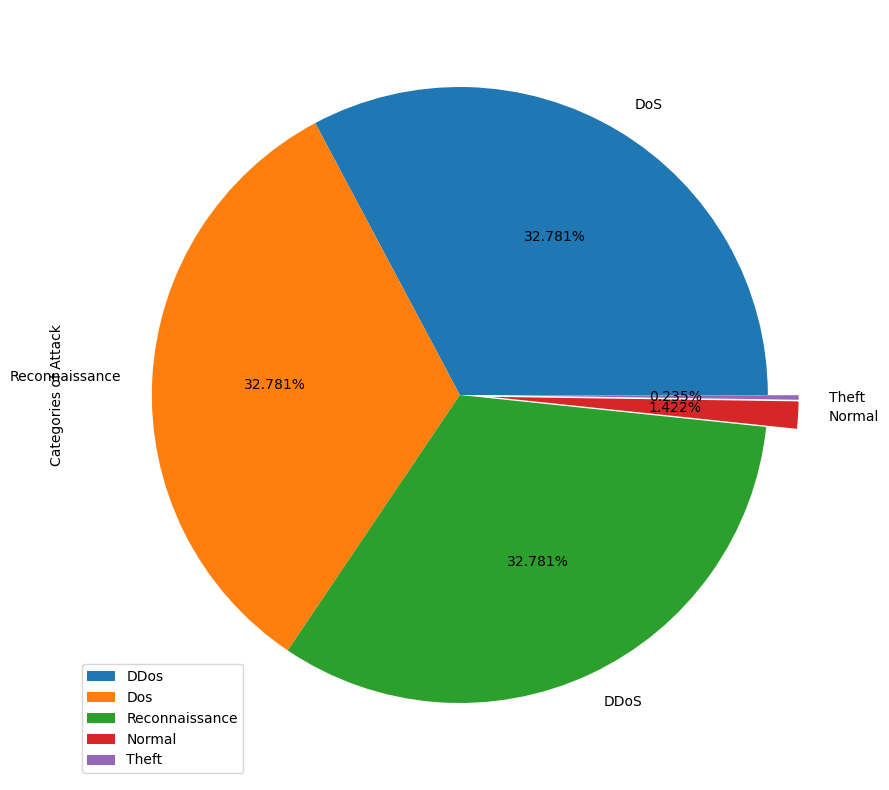

In [151]:
# check the number of unique values in the target variable
print(subset_dataset['category'].value_counts())
subset_dataset['category'].value_counts().plot(kind = 'pie',
                                               explode = [0, 0, 0, 0.1, 0.1],
                                               figsize = (10, 10),
                                               autopct = '%1.3f%%',
                                               shadow = False)
plt.ylabel("Categories of Attack")
plt.legend(["DDos", "Dos", "Reconnaissance", "Normal", "Theft"])
plt.show()

In [152]:
# check the data type of dataframe columns
subset_dataset.dtypes

proto_number           int64
flgs_number            int64
pkts                   int64
bytes                  int64
dur                  float64
spkts                  int64
dpkts                  int64
sbytes                 int64
dbytes                 int64
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
category              object
dtype: object

### Since the data with `Theft` is small, we remove the rows.

category
DoS               11000
Reconnaissance    11000
DDoS              11000
Normal              477
Name: count, dtype: int64


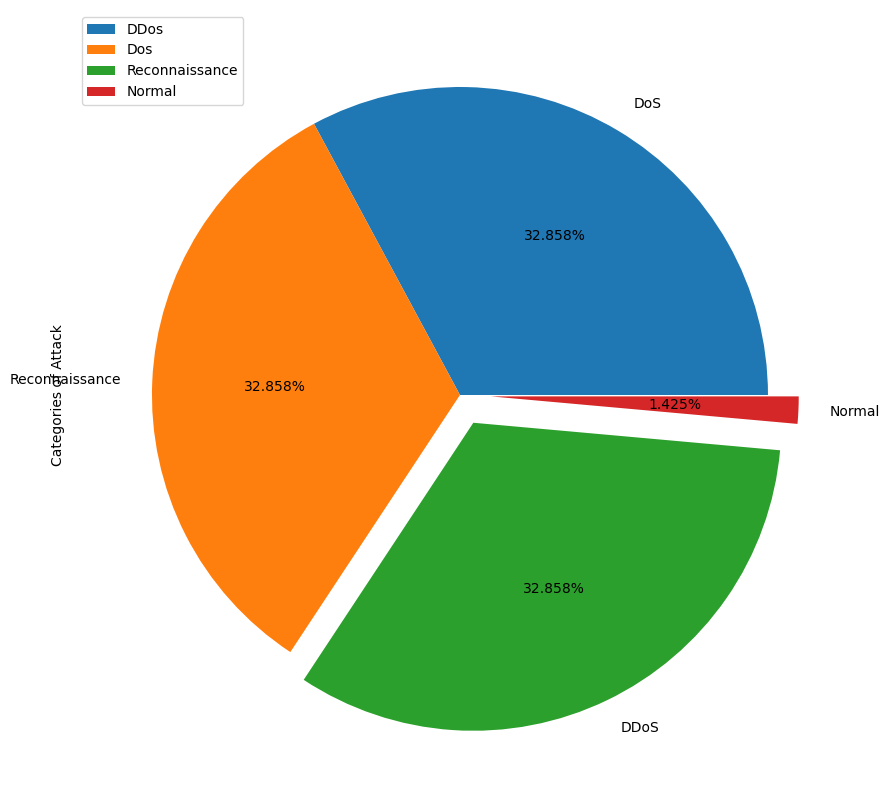

In [153]:
dataset_without_theft = subset_dataset[subset_dataset.category != "Theft"]
dataset_without_theft

# check the number of unique values in the target variable
print(dataset_without_theft['category'].value_counts())
dataset_without_theft['category'].value_counts().plot(kind = 'pie',
                                               explode = [0, 0, 0.1, 0.1],
                                               figsize = (10, 10),
                                               autopct = '%1.3f%%',
                                               shadow = False)
plt.ylabel("Categories of Attack")
plt.legend(["DDos", "Dos", "Reconnaissance", "Normal"])
plt.show()

In [154]:
# # The sport and dport columns are objects. We need to convert them to integers.
# subset_dataset["dport"] = pd.to_numeric(subset_dataset["dport"])
# subset_dataset["sport"] = pd.to_numeric(subset_dataset["sport"])
# #not all the strings in these columns can be parsed. I will figure another way out latet.
# subset_dataset.dtypes

In [155]:
X = dataset_without_theft.iloc[:, :-1].values
y = dataset_without_theft.category
print(X)
print(y)
print(len(X))

[[ 3.        1.        8.       ...  0.        0.279982  3.60197 ]
 [ 3.        1.        8.       ...  0.        0.279982  3.60197 ]
 [ 3.        1.        8.       ...  0.        0.279982  3.60197 ]
 ...
 [ 3.        1.       15.       ...  0.        1.024986  4.885572]
 [ 3.        1.       15.       ...  0.        1.024986  4.885572]
 [ 3.        1.       15.       ...  0.        1.02498   4.885572]]
0         DoS
1         DoS
2         DoS
3         DoS
4         DoS
         ... 
10995    DDoS
10996    DDoS
10997    DDoS
10998    DDoS
10999    DDoS
Name: category, Length: 33477, dtype: object
33477


### Label Encode the target variable

In [156]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                     label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")

Mapping of Label Encoded Classes
{'DDoS': 0, 'DoS': 1, 'Normal': 2, 'Reconnaissance': 3}


In [157]:
# Splitting Dataset into Training and Validation Set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, encoded_y, test_size=0.25,
                                                  random_state=0,
                                                  stratify=encoded_y)

print('X Training set', X_train, sep='\n')
print('X Validation set', X_val, sep='\n')
print('y Training set', y_train, sep='\n')
print('y Validation set', y_val, sep='\n')

X Training set
[[1.000000e+00 1.000000e+00 2.000000e+00 ... 0.000000e+00 0.000000e+00
  4.670000e-04]
 [3.000000e+00 1.000000e+00 8.000000e+00 ... 0.000000e+00 2.800530e-01
  3.602055e+00]
 [3.000000e+00 1.000000e+00 1.100000e+01 ... 0.000000e+00 7.293130e-01
  4.105704e+00]
 ...
 [3.000000e+00 1.000000e+00 1.100000e+01 ... 0.000000e+00 7.293590e-01
  4.105629e+00]
 [1.000000e+00 1.000000e+00 1.000000e+00 ... 0.000000e+00 0.000000e+00
  0.000000e+00]
 [3.000000e+00 1.000000e+00 1.500000e+01 ... 0.000000e+00 1.025101e+00
  4.885493e+00]]
X Validation set
[[1.000000e+00 1.000000e+00 2.000000e+00 ... 0.000000e+00 0.000000e+00
  1.240000e-04]
 [3.000000e+00 1.000000e+00 8.000000e+00 ... 0.000000e+00 2.800250e-01
  3.591519e+00]
 [3.000000e+00 1.000000e+00 1.500000e+01 ... 0.000000e+00 1.025042e+00
  4.884496e+00]
 ...
 [3.000000e+00 1.000000e+00 1.500000e+01 ... 0.000000e+00 1.025030e+00
  4.884442e+00]
 [3.000000e+00 1.000000e+00 1.300000e+01 ... 0.000000e+00 4.466120e-01
  4.495078e+00]


### Feature Scaling

In [158]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
print(scaled_X_train)
print(scaled_X_val)
print(len(scaled_X_train))
print(len(scaled_X_val))

[[-1.43248578 -0.11454024 -0.03321754 ... -0.01090576 -0.01675704
  -1.34674091]
 [ 0.69212554 -0.11454024 -0.02864697 ... -0.01090576 -0.01671956
   0.42061226]
 [ 0.69212554 -0.11454024 -0.02636169 ... -0.01090576 -0.01665944
   0.66776037]
 ...
 [ 0.69212554 -0.11454024 -0.02636169 ... -0.01090576 -0.01665943
   0.66772357]
 [-1.43248578 -0.11454024 -0.03397931 ... -0.01090576 -0.01675704
  -1.34697007]
 [ 0.69212554 -0.11454024 -0.02331464 ... -0.01090576 -0.01661985
   1.05041451]]
[[-1.43248578 -0.11454024 -0.03321754 ... -0.01090576 -0.01675704
  -1.34690923]
 [ 0.69212554 -0.11454024 -0.02864697 ... -0.01090576 -0.01671957
   0.41544209]
 [ 0.69212554 -0.11454024 -0.02331464 ... -0.01090576 -0.01661986
   1.04992527]
 ...
 [ 0.69212554 -0.11454024 -0.02331464 ... -0.01090576 -0.01661986
   1.04989877]
 [ 0.69212554 -0.11454024 -0.02483816 ... -0.01090576 -0.01669727
   0.85883202]
 [ 0.69212554 -0.11454024 -0.02636169 ... -0.01090576 -0.01665943
   0.66771424]]
25107
8370


### Train Model

In [159]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

def evaluate_model(y_val, y_pred):
  """Function to evaluate model and return the metric of the model

  It returns a dictionary with the classification metrics.
  """
  accuracy = accuracy_score(y_val, y_pred)
  precision = precision_score(y_val, y_pred, average='macro')
  recall = recall_score(y_val, y_pred, average='macro')
  f1 = f1_score(y_val, y_pred, average='macro')
  result = {"accuracy_score": accuracy,
            "precision_score": precision,
            "recall_score": recall,
            "f1_score": f1}
  return result

def plot_confusion_matrix(y_val, y_pred, label):
  '''function to plot confusion matrix

  Args
  y_val: array. The validation set of the target variable.
  y_pred: array. Model's prediction.
  label: list. A list containing all the classes in the target variable

  Returns
  It returns a plot of the confusion matrix
  '''
  cm = confusion_matrix(y_val, y_pred)
  fig, ax = plt.subplots(figsize=(10,10))
  ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='')

# class labels
label = ['DDoS', 'DoS',  'Normal', 'Reconnaissance']

### Logistic Regression

{'accuracy_score': 0.9984468339307049, 'precision_score': 0.9849915371179302, 'recall_score': 0.9868636363636364, 'f1_score': 0.9859235062731134}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      1.00      1.00      2750
           2       0.94      0.95      0.95       120
           3       1.00      1.00      1.00      2750

    accuracy                           1.00      8370
   macro avg       0.98      0.99      0.99      8370
weighted avg       1.00      1.00      1.00      8370



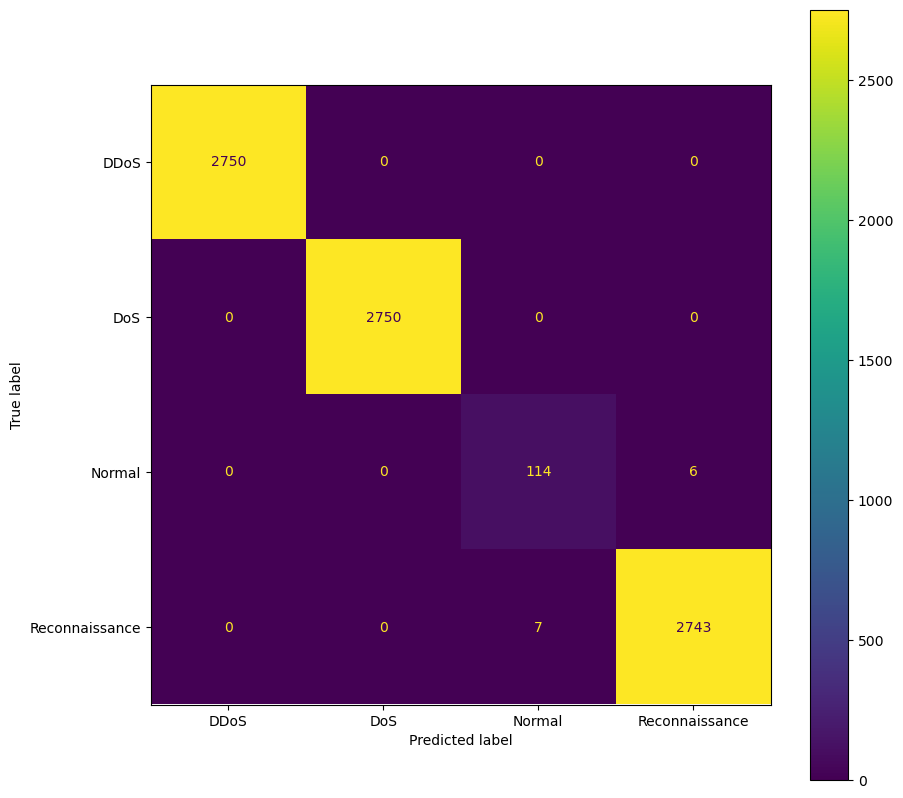

In [160]:
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(max_iter=1000) # , solver='liblinear'
logistic_regression_model.fit(scaled_X_train, y_train)
logistic_regression_y_pred = logistic_regression_model.predict(scaled_X_val)
print(evaluate_model(y_val, logistic_regression_y_pred))
plot_confusion_matrix(y_val, logistic_regression_y_pred, label)
print(classification_report(y_val, logistic_regression_y_pred))

### KNN Algorithm

/home/c4leb/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


{'accuracy_score': 0.9998805256869773, 'precision_score': 0.9999091239549255, 'recall_score': 0.9979166666666667, 'f1_score': 0.9989085286129034}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      1.00      1.00      2750
           2       1.00      0.99      1.00       120
           3       1.00      1.00      1.00      2750

    accuracy                           1.00      8370
   macro avg       1.00      1.00      1.00      8370
weighted avg       1.00      1.00      1.00      8370



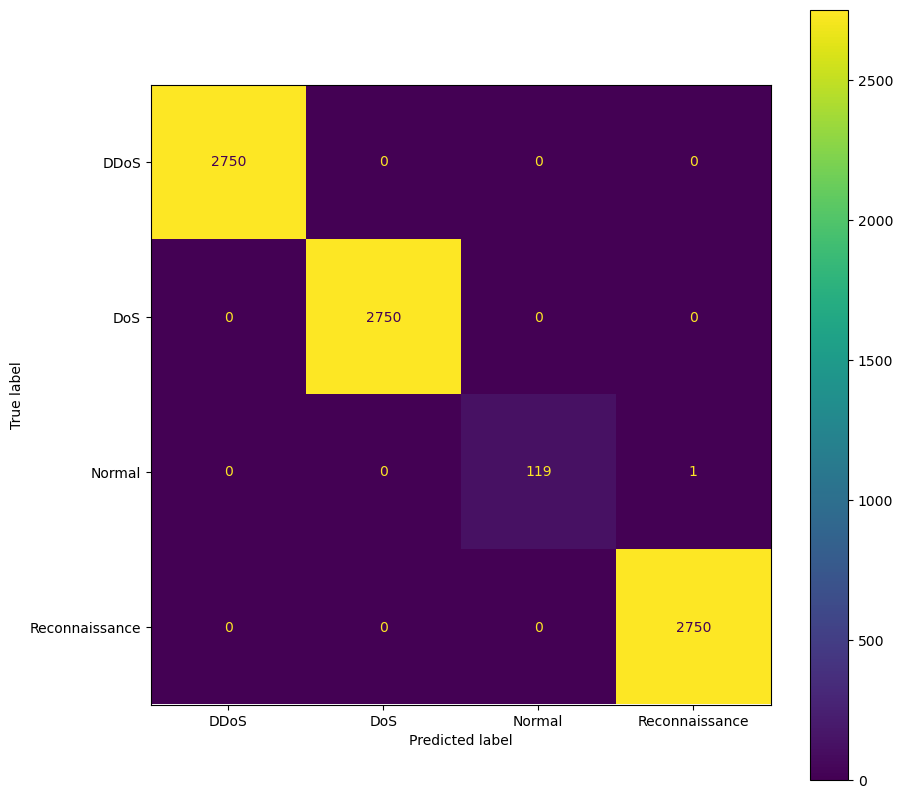

In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(scaled_X_train, y_train)
knn_y_pred = knn_model.predict(scaled_X_val)

print(evaluate_model(y_val, knn_y_pred))
plot_confusion_matrix(y_val, knn_y_pred, label)
print(classification_report(y_val, knn_y_pred))

### Support Vector Machine

{'accuracy_score': 0.9992831541218637, 'precision_score': 0.9880952380952381, 'recall_score': 0.9994545454545455, 'f1_score': 0.9936294139060793}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      1.00      1.00      2750
           2       0.95      1.00      0.98       120
           3       1.00      1.00      1.00      2750

    accuracy                           1.00      8370
   macro avg       0.99      1.00      0.99      8370
weighted avg       1.00      1.00      1.00      8370



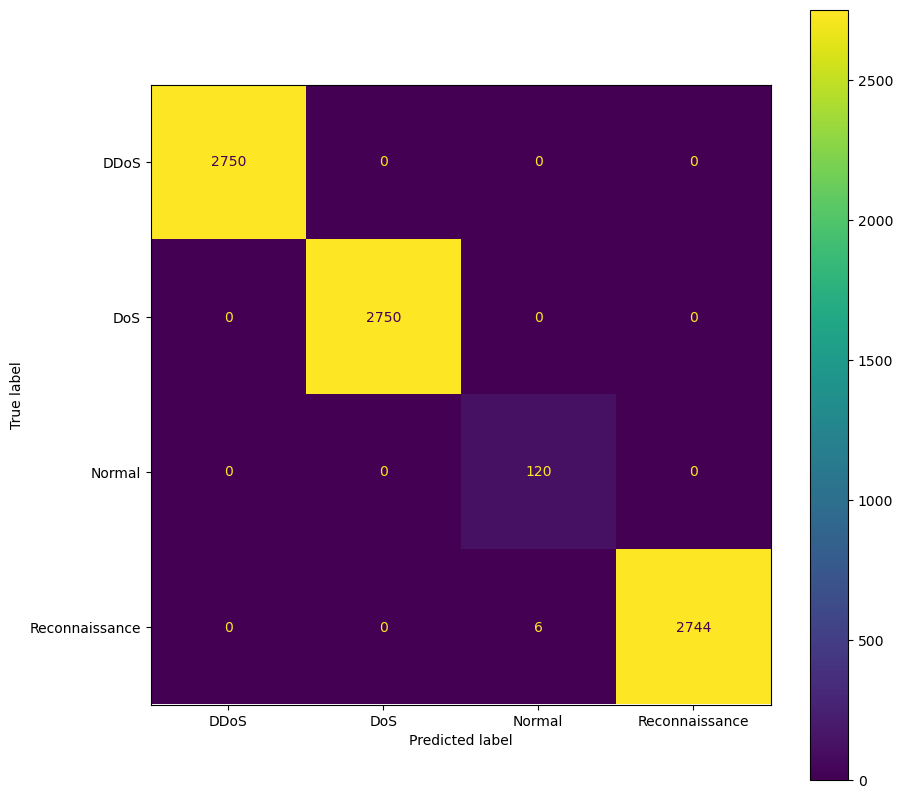

In [162]:
from sklearn import svm
svm_model = svm.SVC(kernel='rbf')
svm_model.fit(scaled_X_train, y_train)
y_pred_svm = svm_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_svm))
print(classification_report(y_val, y_pred_svm))
plot_confusion_matrix(y_val, y_pred_svm, label)

### Decision Tree Classifier

{'accuracy_score': 0.9998805256869773, 'precision_score': 0.9979338842975207, 'recall_score': 0.9999090909090909, 'f1_score': 0.9989171927902395}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      1.00      1.00      2750
           2       0.99      1.00      1.00       120
           3       1.00      1.00      1.00      2750

    accuracy                           1.00      8370
   macro avg       1.00      1.00      1.00      8370
weighted avg       1.00      1.00      1.00      8370



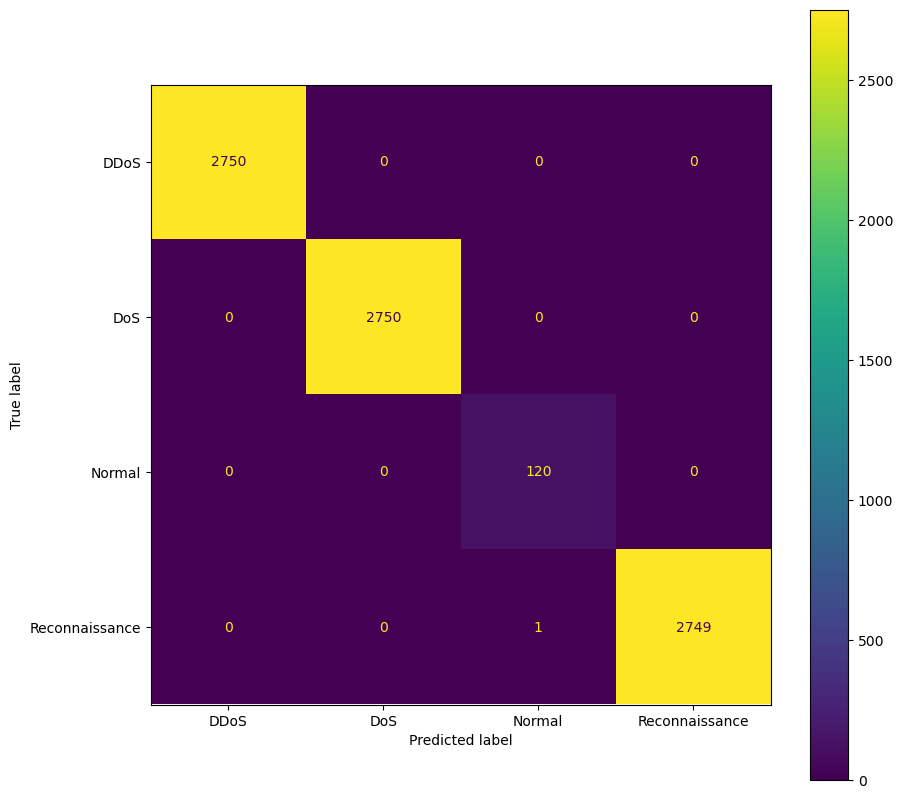

In [163]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion="entropy")
decision_tree_model.fit(scaled_X_train, y_train)
decision_tree_y_pred = decision_tree_model.predict(scaled_X_val)

print(evaluate_model(y_val, decision_tree_y_pred))
print(classification_report(y_val, decision_tree_y_pred))
plot_confusion_matrix(y_val, decision_tree_y_pred, label)

### Random Forest Classifier

{'accuracy_score': 1.0, 'precision_score': 1.0, 'recall_score': 1.0, 'f1_score': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      1.00      1.00      2750
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00      2750

    accuracy                           1.00      8370
   macro avg       1.00      1.00      1.00      8370
weighted avg       1.00      1.00      1.00      8370



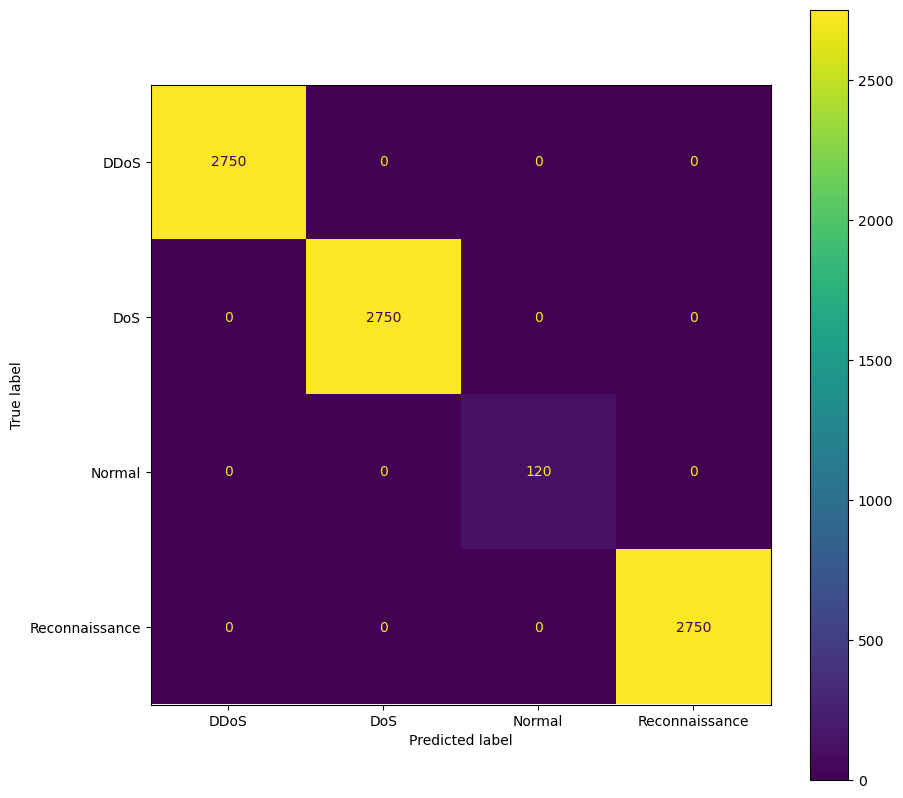

In [164]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=200,
                                             criterion="entropy")
random_forest_model.fit(scaled_X_train, y_train)
random_forest_y_pred = random_forest_model.predict(scaled_X_val)

print(evaluate_model(y_val, random_forest_y_pred))
print(classification_report(y_val, random_forest_y_pred))
plot_confusion_matrix(y_val, random_forest_y_pred, label)

### Naive Bayes

{'accuracy_score': 0.9826762246117084, 'precision_score': 0.835946072052171, 'recall_score': 0.8214469696969697, 'f1_score': 0.8279090463229231}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      1.00      1.00      2750
           2       0.37      0.31      0.34       120
           3       0.97      0.98      0.97      2750

    accuracy                           0.98      8370
   macro avg       0.84      0.82      0.83      8370
weighted avg       0.98      0.98      0.98      8370



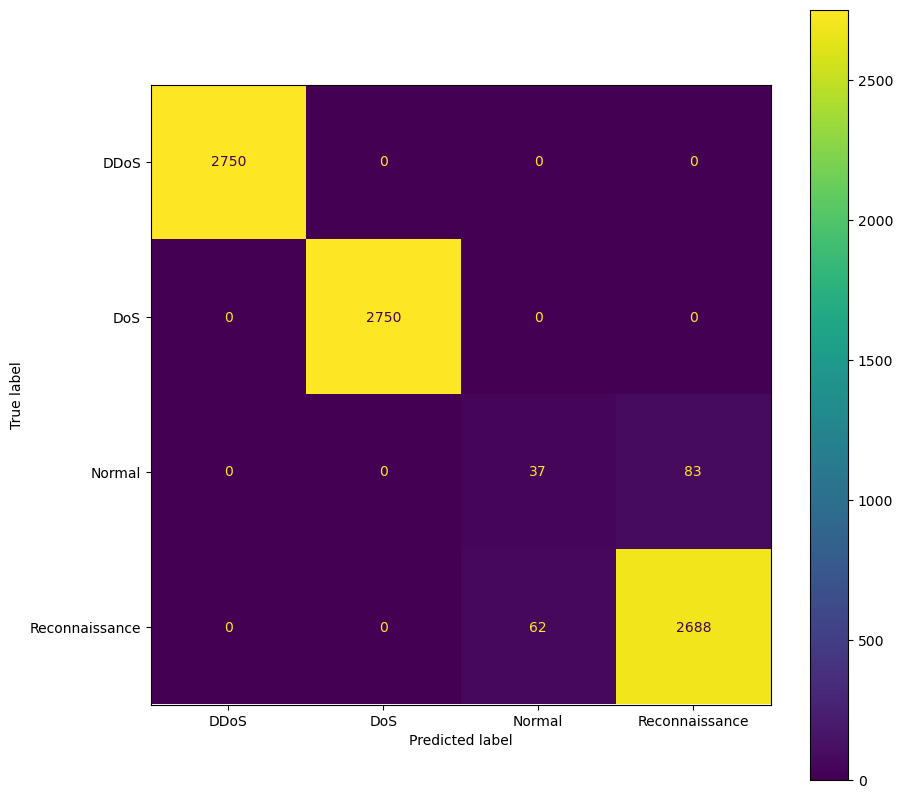

In [165]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(scaled_X_train, y_train)
y_pred_nb = naive_bayes_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_nb))
print(classification_report(y_val, y_pred_nb))
plot_confusion_matrix(y_val, y_pred_nb, label)

### XGBOOST

{'accuracy_score': 1.0, 'precision_score': 1.0, 'recall_score': 1.0, 'f1_score': 1.0}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      1.00      1.00      2750
           2       1.00      1.00      1.00       120
           3       1.00      1.00      1.00      2750

    accuracy                           1.00      8370
   macro avg       1.00      1.00      1.00      8370
weighted avg       1.00      1.00      1.00      8370



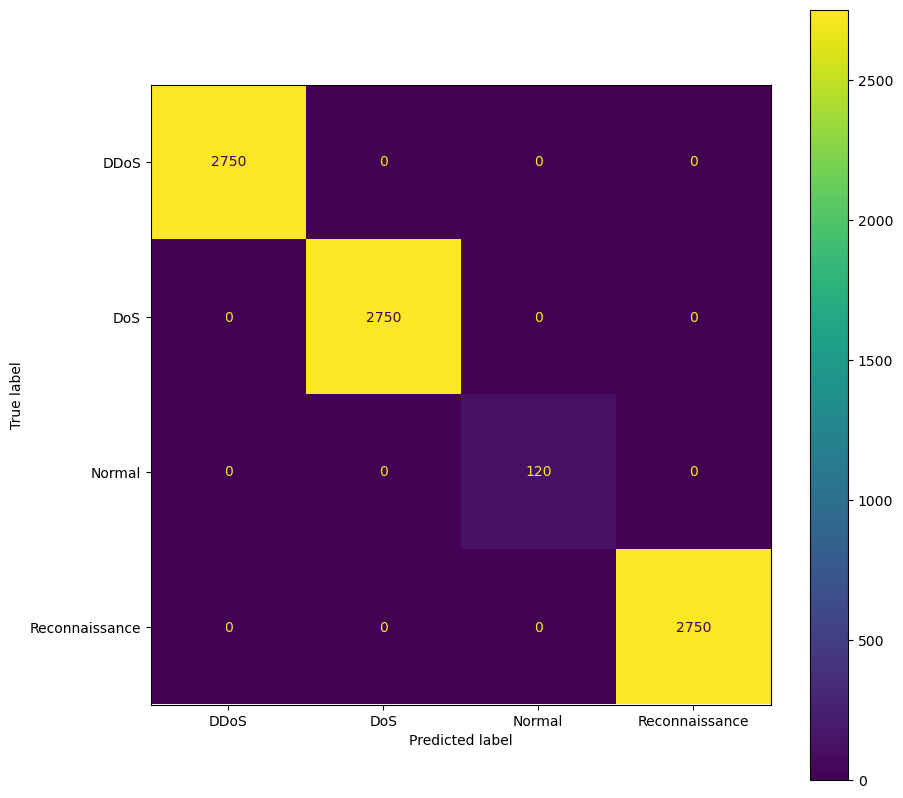

In [166]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()
xgboost_model.fit(scaled_X_train, y_train)
y_pred_xgb = xgboost_model.predict(scaled_X_val)

print(evaluate_model(y_val, y_pred_xgb))
print(classification_report(y_val, y_pred_xgb))
plot_confusion_matrix(y_val, y_pred_xgb, label)

### Artificial Neural Network

In [137]:
from tensorflow.keras.utils import to_categorical
# from keras.utils import np_utils

encoded_y_train = to_categorical(y_train)
encoded_y_val = to_categorical(y_val)
encoded_y_train

array([[0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.]], dtype=float32)

the input layer/first layer is the number of features in the dataset which is 18, second layer is 12, third is 8 and output is 4

In [167]:
import tensorflow as tf
print(tf.__version__)



ann_model = tf.keras.models.Sequential()
ann_model.add(tf.keras.layers.Dense(units=12, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

ann_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
history = ann_model.fit(scaled_X_train, encoded_y_train, validation_split=0.25, batch_size=32, epochs=100)

2.13.0
Epoch 1/100
589/589 [==============================] - 3s 3ms/step - loss: 0.4514 - accuracy: 0.8365 - precision_10: 0.9416 - recall_10: 0.7426 - val_loss: 0.1208 - val_accuracy: 0.9667 - val_precision_10: 0.9728 - val_recall_10: 0.9635
Epoch 2/100
589/589 [==============================] - 1s 3ms/step - loss: 0.0692 - accuracy: 0.9797 - precision_10: 0.9810 - recall_10: 0.9771 - val_loss: 0.0374 - val_accuracy: 0.9968 - val_precision_10: 0.9970 - val_recall_10: 0.9963
Epoch 3/100
589/589 [==============================] - 2s 3ms/step - loss: 0.0243 - accuracy: 0.9970 - precision_10: 0.9971 - recall_10: 0.9970 - val_loss: 0.0151 - val_accuracy: 0.9981 - val_precision_10: 0.9981 - val_recall_10: 0.9979
Epoch 4/100
589/589 [==============================] - 1s 2ms/step - loss: 0.0119 - accuracy: 0.9978 - precision_10: 0.9978 - recall_10: 0.9977 - val_loss: 0.0088 - val_accuracy: 0.9981 - val_precision_10: 0.9981 - val_recall_10: 0.9979
Epoch 5/100
589/589 [========================

Epoch 35/100
589/589 [==============================] - 1s 2ms/step - loss: 3.5953e-04 - accuracy: 0.9998 - precision_10: 0.9998 - recall_10: 0.9998 - val_loss: 7.4174e-04 - val_accuracy: 0.9997 - val_precision_10: 0.9997 - val_recall_10: 0.9997
Epoch 36/100
589/589 [==============================] - 1s 2ms/step - loss: 1.6207e-04 - accuracy: 0.9999 - precision_10: 0.9999 - recall_10: 0.9999 - val_loss: 7.8872e-04 - val_accuracy: 0.9997 - val_precision_10: 0.9997 - val_recall_10: 0.9997
Epoch 37/100
589/589 [==============================] - 1s 2ms/step - loss: 3.2435e-04 - accuracy: 0.9998 - precision_10: 0.9998 - recall_10: 0.9998 - val_loss: 9.0093e-04 - val_accuracy: 0.9998 - val_precision_10: 0.9998 - val_recall_10: 0.9998
Epoch 38/100
589/589 [==============================] - 2s 3ms/step - loss: 2.6140e-04 - accuracy: 0.9998 - precision_10: 0.9998 - recall_10: 0.9998 - val_loss: 8.3835e-04 - val_accuracy: 0.9997 - val_precision_10: 0.9997 - val_recall_10: 0.9997
Epoch 39/100
589

589/589 [==============================] - 1s 2ms/step - loss: 2.2438e-05 - accuracy: 1.0000 - precision_10: 1.0000 - recall_10: 1.0000 - val_loss: 6.0986e-04 - val_accuracy: 0.9998 - val_precision_10: 0.9998 - val_recall_10: 0.9998
Epoch 69/100
589/589 [==============================] - 1s 2ms/step - loss: 1.3689e-04 - accuracy: 0.9999 - precision_10: 0.9999 - recall_10: 0.9999 - val_loss: 8.1065e-04 - val_accuracy: 0.9997 - val_precision_10: 0.9997 - val_recall_10: 0.9997
Epoch 70/100
589/589 [==============================] - 1s 2ms/step - loss: 7.0102e-04 - accuracy: 0.9998 - precision_10: 0.9998 - recall_10: 0.9998 - val_loss: 0.0013 - val_accuracy: 0.9997 - val_precision_10: 0.9997 - val_recall_10: 0.9997
Epoch 71/100
589/589 [==============================] - 1s 2ms/step - loss: 3.2808e-05 - accuracy: 1.0000 - precision_10: 1.0000 - recall_10: 1.0000 - val_loss: 7.8643e-04 - val_accuracy: 0.9998 - val_precision_10: 0.9998 - val_recall_10: 0.9998
Epoch 72/100
589/589 [===========

In [168]:
ann_y_pred = ann_model.predict(scaled_X_val)
ann_y_pred = (ann_y_pred > 0.5)
ann_y_pred

262/262 [==============================] - 0s 2ms/step


array([[False, False, False,  True],
       [False,  True, False, False],
       [ True, False, False, False],
       ...,
       [ True, False, False, False],
       [False,  True, False, False],
       [ True, False, False, False]])

In [169]:

# Check the test accuracy, precision, and recall
_, accuracy, precision, recall = ann_model.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

262/262 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9998 - precision_10: 0.9998 - recall_10: 0.9998
Accuracy: 99.98


In [170]:
# Performance Evaluations
# print(history.history.keys())

Text(0.5, 0, 'epoch')

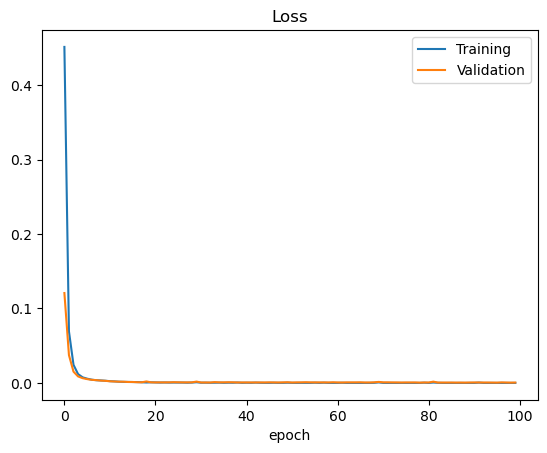

In [171]:
# Plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

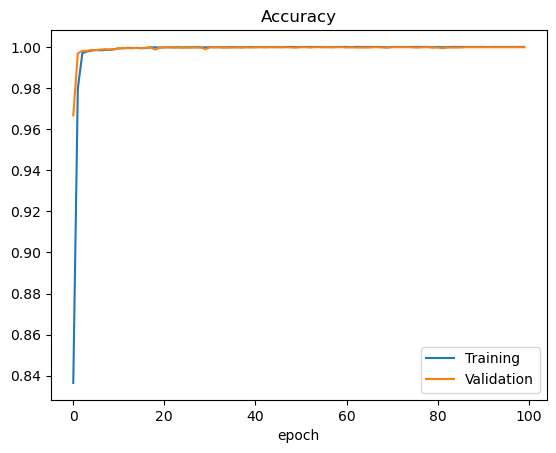

In [172]:
# Plot graph between training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

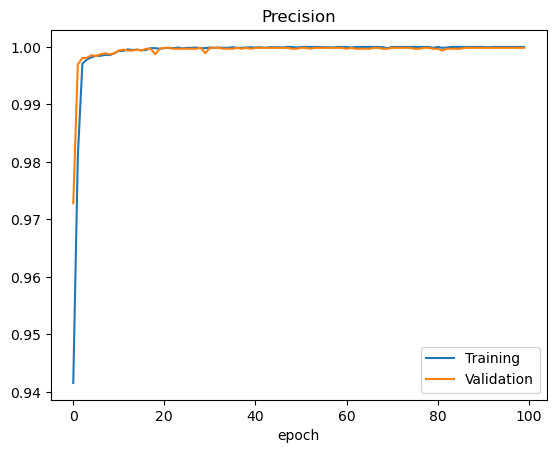

In [173]:
# Plot graph between training and validation precision
plt.plot(history.history['precision_10'])
plt.plot(history.history['val_precision_10'])
plt.legend(['Training', 'Validation'])
plt.title('Precision')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

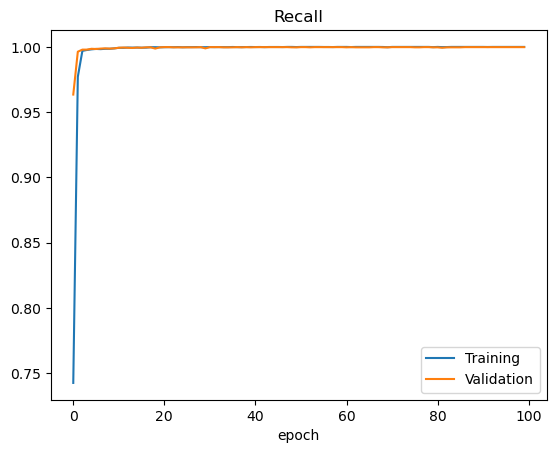

In [174]:
# Plot graph between training and validation recall
plt.plot(history.history['recall_10'])
plt.plot(history.history['val_recall_10'])
plt.legend(['Training', 'Validation'])
plt.title('Recall')
plt.xlabel('epoch')

{'accuracy_score': 0.9997610513739545, 'precision_score': 0.999818247909851, 'recall_score': 0.9978257575757576, 'f1_score': 0.9988176195189891}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      1.00      1.00      2750
           2       1.00      0.99      1.00       120
           3       1.00      1.00      1.00      2750

   micro avg       1.00      1.00      1.00      8370
   macro avg       1.00      1.00      1.00      8370
weighted avg       1.00      1.00      1.00      8370
 samples avg       1.00      1.00      1.00      8370



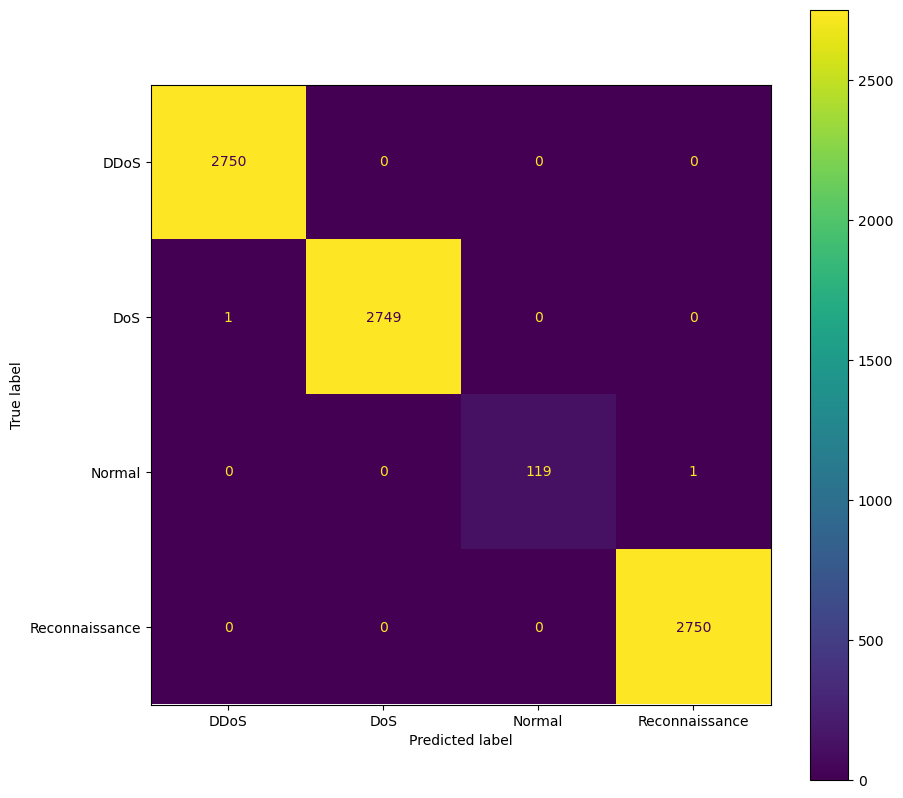

In [175]:
print(evaluate_model(encoded_y_val, ann_y_pred))
print(classification_report(encoded_y_val, ann_y_pred))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), ann_y_pred.argmax(axis=1), label)

# implementing the cnn model

In [190]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape(target_shape=(scaled_X_train.shape[1], 1), input_shape=(scaled_X_train.shape[1],)),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

cnn_history = cnn_model.fit(scaled_X_train, encoded_y_train, validation_data=(scaled_X_val, encoded_y_val), batch_size=32, epochs=30)


Epoch 1/30
785/785 [==============================] - 6s 6ms/step - loss: 0.0986 - accuracy: 0.9734 - precision_12: 0.9832 - recall_12: 0.9609 - val_loss: 0.0084 - val_accuracy: 0.9989 - val_precision_12: 0.9989 - val_recall_12: 0.9989
Epoch 2/30
785/785 [==============================] - 4s 6ms/step - loss: 0.0082 - accuracy: 0.9986 - precision_12: 0.9986 - recall_12: 0.9986 - val_loss: 0.0038 - val_accuracy: 0.9994 - val_precision_12: 0.9994 - val_recall_12: 0.9994
Epoch 3/30
785/785 [==============================] - 5s 6ms/step - loss: 0.0050 - accuracy: 0.9988 - precision_12: 0.9988 - recall_12: 0.9988 - val_loss: 0.0026 - val_accuracy: 0.9994 - val_precision_12: 0.9994 - val_recall_12: 0.9994
Epoch 4/30
785/785 [==============================] - 5s 7ms/step - loss: 0.0035 - accuracy: 0.9991 - precision_12: 0.9991 - recall_12: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9994 - val_precision_12: 0.9994 - val_recall_12: 0.9994
Epoch 5/30
785/785 [==============================] - 5s

In [191]:
cnn_y_pred = cnn_model.predict(scaled_X_val)
cnn_y_pred = (cnn_y_pred > 0.5)
cnn_y_pred

262/262 [==============================] - 1s 2ms/step


array([[False, False, False,  True],
       [False,  True, False, False],
       [ True, False, False, False],
       ...,
       [ True, False, False, False],
       [False,  True, False, False],
       [ True, False, False, False]])

In [192]:
# Check the validation accuracy
_, accuracy, precision, recall = cnn_model.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

262/262 [==============================] - 1s 3ms/step - loss: 4.1350e-04 - accuracy: 0.9998 - precision_12: 0.9998 - recall_12: 0.9998
Accuracy: 99.98


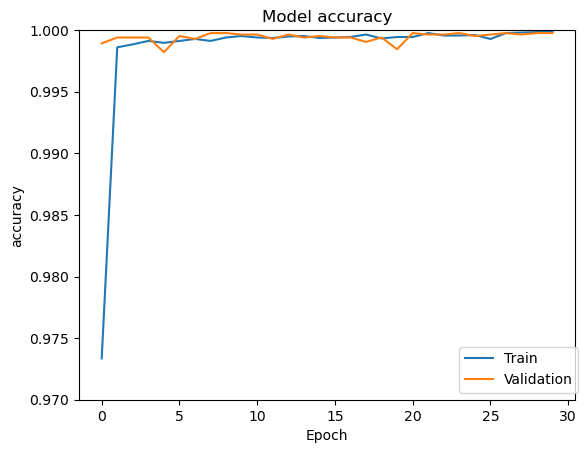

In [205]:
def plot_metrics(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history['val_' + metric])
    plt.title('Model ' + metric)
    plt.ylabel(metric)
    plt.xlabel('Epoch')
    plt.ylim([0.97, 1.0])  # Set the limits of the y-axis here
    plt.legend(['Train', 'Validation'], loc='lower right', bbox_to_anchor=(1.02, 0))
    plt.show()

plot_metrics(cnn_history, 'accuracy')

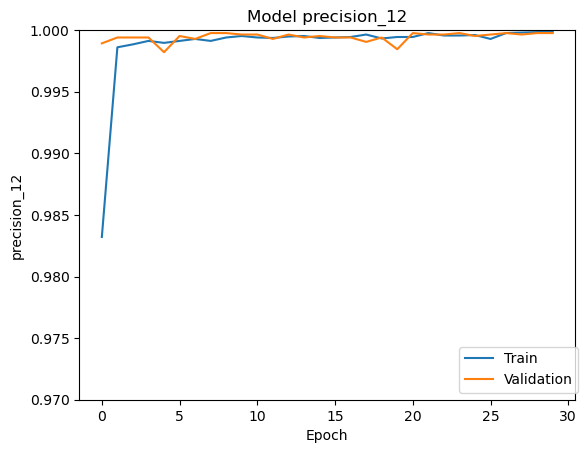

In [206]:
plot_metrics(cnn_history, 'precision_12')

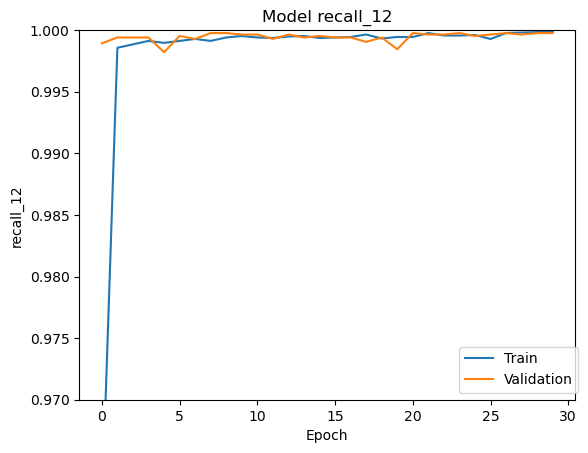

In [207]:
plot_metrics(cnn_history, 'recall_12')

{'accuracy_score': 0.9997610513739545, 'precision_score': 0.9978257575757576, 'recall_score': 0.9978257575757576, 'f1_score': 0.9978257575757576}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      1.00      1.00      2750
           2       0.99      0.99      0.99       120
           3       1.00      1.00      1.00      2750

    accuracy                           1.00      8370
   macro avg       1.00      1.00      1.00      8370
weighted avg       1.00      1.00      1.00      8370



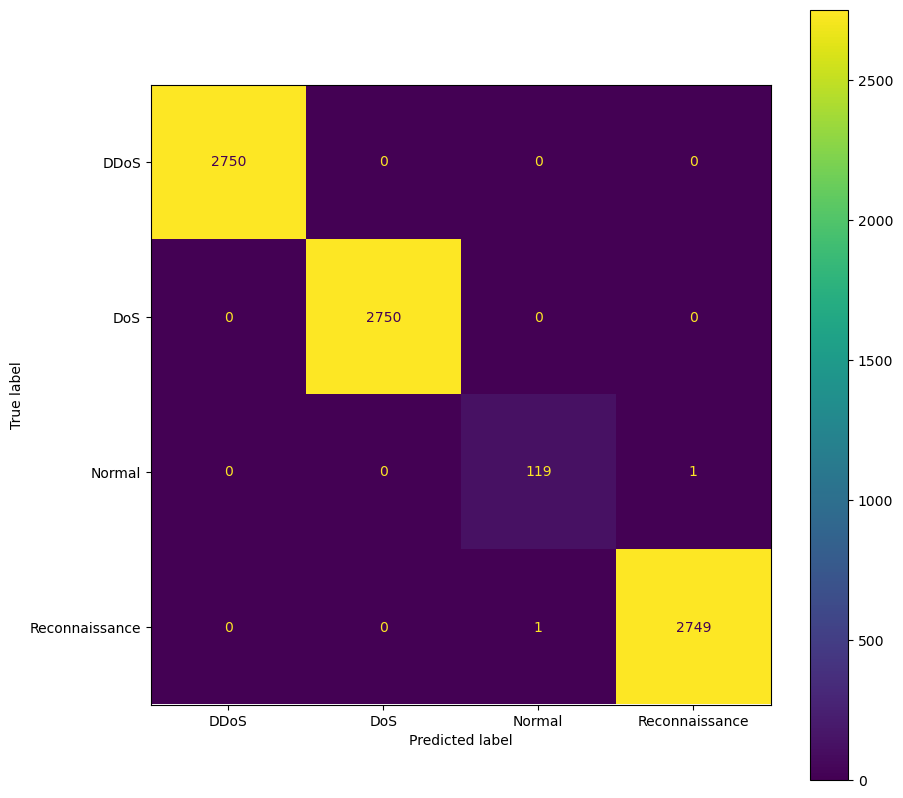

In [197]:
print(evaluate_model(encoded_y_val.argmax(axis=1), cnn_y_pred.argmax(axis=1)))
print(classification_report(encoded_y_val.argmax(axis=1), cnn_y_pred.argmax(axis=1)))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), cnn_y_pred.argmax(axis=1), label)

# Implementing RNN model

In [198]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Dense, LSTM


rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Reshape(target_shape=(scaled_X_train.shape[1], 1), input_shape=(scaled_X_train.shape[1],)),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation='softmax')
])

rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

rnn_history = rnn_model.fit(scaled_X_train, encoded_y_train, validation_data=(scaled_X_val, encoded_y_val), batch_size=32, epochs=100)


Epoch 1/100
785/785 [==============================] - 18s 18ms/step - loss: 0.2429 - accuracy: 0.9047 - precision_13: 0.9147 - recall_13: 0.8860 - val_loss: 0.0349 - val_accuracy: 0.9963 - val_precision_13: 0.9963 - val_recall_13: 0.9963
Epoch 2/100
785/785 [==============================] - 16s 20ms/step - loss: 0.0362 - accuracy: 0.9899 - precision_13: 0.9904 - recall_13: 0.9895 - val_loss: 0.0102 - val_accuracy: 0.9970 - val_precision_13: 0.9971 - val_recall_13: 0.9970
Epoch 3/100
785/785 [==============================] - 13s 17ms/step - loss: 0.0072 - accuracy: 0.9984 - precision_13: 0.9984 - recall_13: 0.9982 - val_loss: 0.0130 - val_accuracy: 0.9963 - val_precision_13: 0.9964 - val_recall_13: 0.9962
Epoch 4/100
785/785 [==============================] - 13s 17ms/step - loss: 0.0069 - accuracy: 0.9980 - precision_13: 0.9980 - recall_13: 0.9980 - val_loss: 0.0108 - val_accuracy: 0.9973 - val_precision_13: 0.9973 - val_recall_13: 0.9973
Epoch 5/100
785/785 [=======================

785/785 [==============================] - 12s 16ms/step - loss: 0.0012 - accuracy: 0.9996 - precision_13: 0.9996 - recall_13: 0.9996 - val_loss: 0.0021 - val_accuracy: 0.9992 - val_precision_13: 0.9992 - val_recall_13: 0.9992
Epoch 36/100
785/785 [==============================] - 13s 16ms/step - loss: 7.4607e-04 - accuracy: 0.9997 - precision_13: 0.9997 - recall_13: 0.9997 - val_loss: 8.2941e-04 - val_accuracy: 0.9998 - val_precision_13: 0.9998 - val_recall_13: 0.9998
Epoch 37/100
785/785 [==============================] - 13s 16ms/step - loss: 0.0013 - accuracy: 0.9997 - precision_13: 0.9997 - recall_13: 0.9997 - val_loss: 0.0013 - val_accuracy: 0.9995 - val_precision_13: 0.9995 - val_recall_13: 0.9995
Epoch 38/100
785/785 [==============================] - 12s 15ms/step - loss: 0.0011 - accuracy: 0.9996 - precision_13: 0.9996 - recall_13: 0.9996 - val_loss: 0.0032 - val_accuracy: 0.9989 - val_precision_13: 0.9989 - val_recall_13: 0.9989
Epoch 39/100
785/785 [=======================

785/785 [==============================] - 6s 8ms/step - loss: 6.8123e-06 - accuracy: 1.0000 - precision_13: 1.0000 - recall_13: 1.0000 - val_loss: 1.0222e-05 - val_accuracy: 1.0000 - val_precision_13: 1.0000 - val_recall_13: 1.0000
Epoch 69/100
785/785 [==============================] - 6s 8ms/step - loss: 2.5378e-06 - accuracy: 1.0000 - precision_13: 1.0000 - recall_13: 1.0000 - val_loss: 1.5582e-05 - val_accuracy: 1.0000 - val_precision_13: 1.0000 - val_recall_13: 1.0000
Epoch 70/100
785/785 [==============================] - 6s 8ms/step - loss: 1.5734e-06 - accuracy: 1.0000 - precision_13: 1.0000 - recall_13: 1.0000 - val_loss: 1.8047e-05 - val_accuracy: 1.0000 - val_precision_13: 1.0000 - val_recall_13: 1.0000
Epoch 71/100
785/785 [==============================] - 6s 8ms/step - loss: 1.0530e-06 - accuracy: 1.0000 - precision_13: 1.0000 - recall_13: 1.0000 - val_loss: 1.7782e-05 - val_accuracy: 1.0000 - val_precision_13: 1.0000 - val_recall_13: 1.0000
Epoch 72/100
785/785 [=======

In [199]:
rnn_y_pred = rnn_model.predict(scaled_X_val)
rnn_y_pred = (rnn_y_pred > 0.5)
rnn_y_pred

262/262 [==============================] - 1s 3ms/step


array([[False, False, False,  True],
       [False,  True, False, False],
       [ True, False, False, False],
       ...,
       [ True, False, False, False],
       [False,  True, False, False],
       [ True, False, False, False]])

In [200]:
# Check the validation accuracy
_, accuracy, precision, recall = rnn_model.evaluate(scaled_X_val, encoded_y_val)
print('Accuracy: %.2f' % (accuracy*100))

262/262 [==============================] - 1s 4ms/step - loss: 4.5684e-04 - accuracy: 0.9999 - precision_13: 0.9999 - recall_13: 0.9999
Accuracy: 99.99


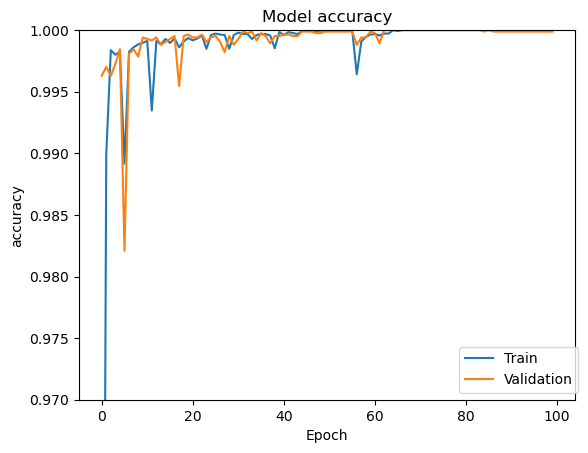

In [208]:
plot_metrics(rnn_history, 'accuracy')

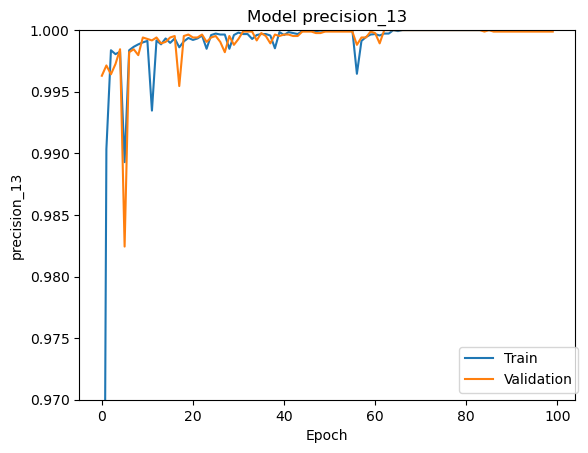

In [209]:
plot_metrics(rnn_history, 'precision_13')

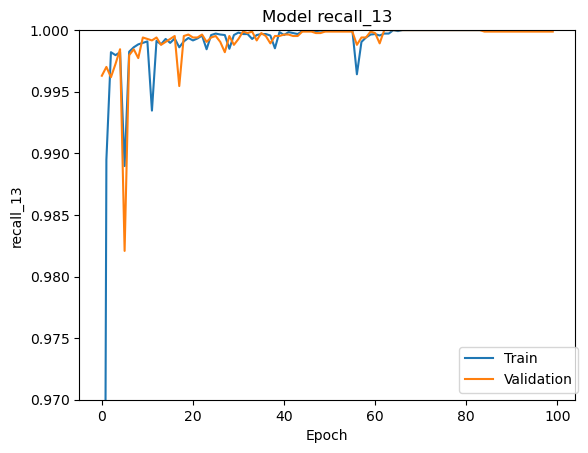

In [210]:
plot_metrics(rnn_history, 'recall_13')

{'accuracy_score': 0.9998805256869773, 'precision_score': 0.9999091239549255, 'recall_score': 0.9979166666666667, 'f1_score': 0.9989085286129034}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2750
           1       1.00      1.00      1.00      2750
           2       1.00      0.99      1.00       120
           3       1.00      1.00      1.00      2750

    accuracy                           1.00      8370
   macro avg       1.00      1.00      1.00      8370
weighted avg       1.00      1.00      1.00      8370



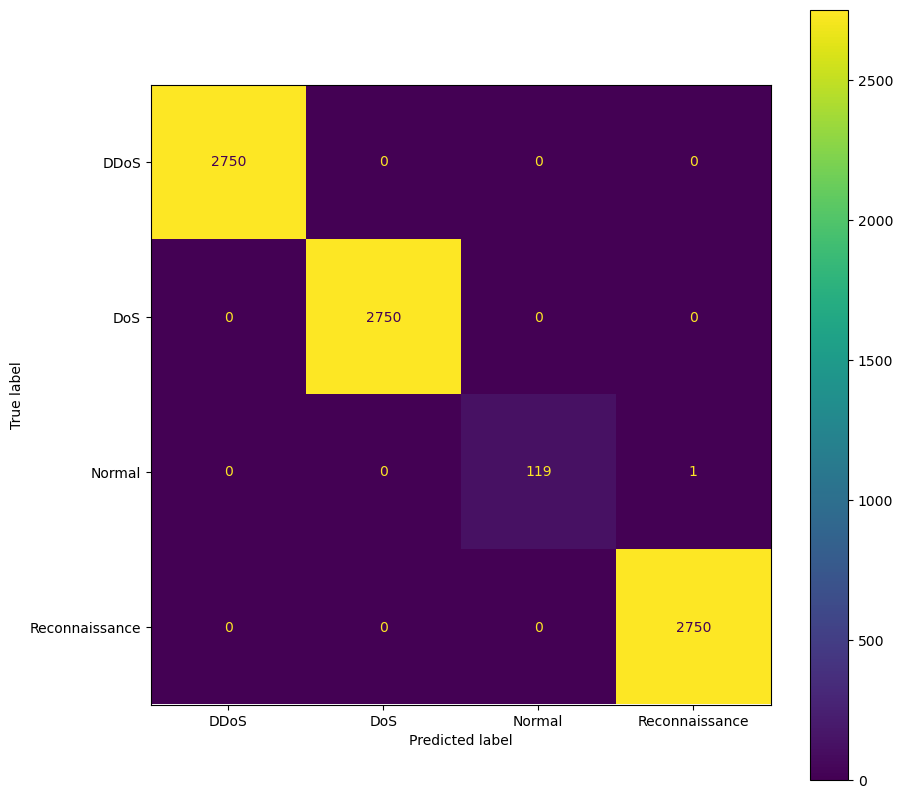

In [211]:
print(evaluate_model(encoded_y_val.argmax(axis=1), rnn_y_pred.argmax(axis=1)))
print(classification_report(encoded_y_val.argmax(axis=1), rnn_y_pred.argmax(axis=1)))
plot_confusion_matrix(encoded_y_val.argmax(axis=1), rnn_y_pred.argmax(axis=1), label)